In [142]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 


import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

import math as math

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity
from sklearn.preprocessing import PolynomialFeatures

Text(0.5,1,'y = sin(x) + noise')

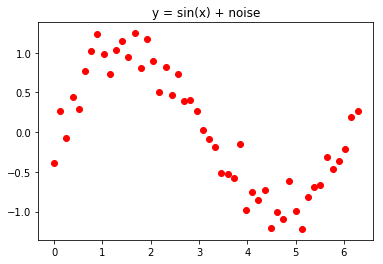

In [143]:
def f(x):
    return np.sin(x)

X = np.linspace(0,np.pi*2,50)
Y = f(X) + np.random.normal(0,0.2,50)

fig, ax = plt.subplots()
ax.scatter(X, Y, marker='o', c='r')
ax.set_title('y = sin(x) + noise')

In [144]:
degree = 4
def designmat1(Xmat):
    return np.vander(X, degree, increasing = True)

In [145]:
lam = 0.0

def gradsqloss(Amat, y, wt):
    n, p = Amat.shape
    return (-2/n)*Amat.T.dot((y-Amat.dot(wt))) + (2*lam*wt)

def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    meanrsshistory = [] 
    w = winit
    
    for i in range(numiter): 
        meanrss = np.square(y-Amat.dot(w)).mean() + (lam*(np.square(w).sum()))
        whistory.append(w)
        meanrsshistory.append(meanrss)
        grad = gradsqloss(Amat, y, w)
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(meanrsshistory)

C:\Users\tzica\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
C:\Users\tzica\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\tzica\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\tzica\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


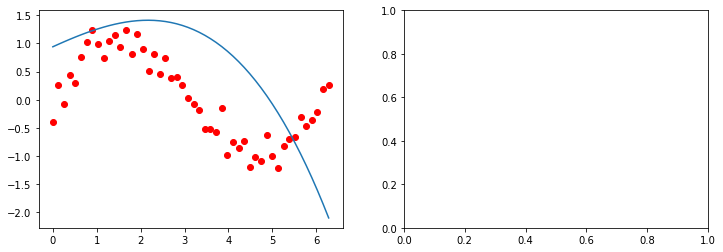

In [146]:
Xmat = designmat1(X)
n, p = Xmat.shape
w0 = np.random.randn(p)
num_iters = 1000
rates = [.0001,.005,.01,.02]
#xinput = np.linspace(-4,10,100)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(X,Y,marker='o',color='r')
for i, r in enumerate(rates):
    wfin, whist, meanlosstrace = gradientdescent(Xmat, Y,  w0, r, num_iters)
    ax[0].plot(X,np.matmul(Xmat,wfin), label=r)
    

In [147]:
def analyticalW(Xmat, lam, Y):
    part1 = np.linalg.inv(np.matmul(Xmat.T, Xmat)+(lam * np.identity(p)))
    part2 = np.matmul(Xmat.T,Y)
    return np.matmul(part1,part2)

[ 2.50507778  0.96301713 -0.96421238  0.12357376]


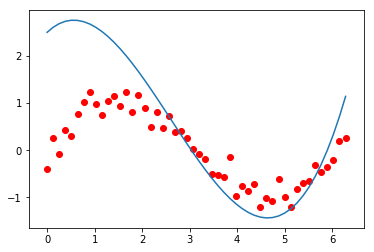

In [148]:
lam = -10
Xmat = designmat1(X)
n, p = Xmat.shape
w = analyticalW(Xmat, lam, Y)
fig, ax = plt.subplots()
ax.plot(X, np.matmul(Xmat, w))
ax.scatter(X, Y, marker='o', c='r')
print(w)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

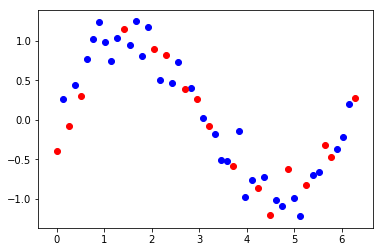

In [150]:
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [151]:
def polyfn(X, wtvector):
    w = np.asarray(wtvector)
    n = len(w)
    out = 0 
    for i in range(n):
        out += w[n-i-1]*np.power(X, i) # w[n-1]*1 + w[n-2]*x + w[n-3]*(x**2) + ... + w[0]*(x**(n-1))
    return out

def designmatpoly(X):
    eye = np.ones(X.shape)
    Xsq = polyfn(X, [1,0,0] ) # equivalent to np.square(X)
    return np.stack((eye, X, Xsq)).T

A_train = designmatpoly(X_train)
A_test = designmatpoly(X_test)

In [152]:
from sklearn.preprocessing import PolynomialFeatures

poly2feat = PolynomialFeatures(degree =2, include_bias = True)
A_test_sklearn = poly2feat.fit_transform(X_test.reshape(-1,1)) # scikit-learn's design matrix
print(np.sum(A_test - A_test_sklearn)**2) # print sum of squares of the entries of the matrix of differences

0.0


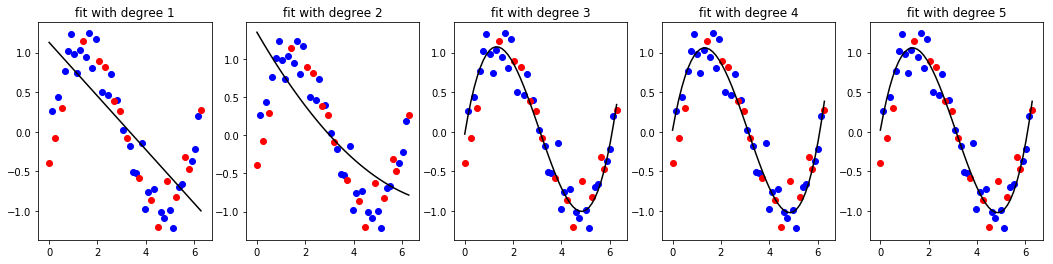

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')

for d in range(5):
    features = PolynomialFeatures(degree = d+1, include_bias = True)
    X_feature = features.fit_transform(X.reshape(-1,1))
    X_feature_train =  features.fit_transform(X_train.reshape(-1,1))
    X_feature_test =  features.fit_transform(X_test.reshape(-1,1))
    regress = LinearRegression()
    regress.fit(X_feature_train, y_train)
    y_predict=regress.predict(X_feature_test)
    y_model = regress.predict(X_feature)
#    print(linear_reg.coef_, linear_reg.intercept_)
    ax[d].scatter(X_train,y_train, c='b')
    ax[d].scatter(X_test, y_test, c='r')
    ax[d].plot(X, y_model, c='k')
    title = 'fit with degree '+str(d+1)
    ax[d].set_title(title)